<a href="https://colab.research.google.com/github/asma512/Csc44800/blob/main/AI_Assignment_2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Fetal Health Classification

## Abstract

Fetal mortality is a major public health problem. The U.S. fetal mortality rate in 2019 was 5.70 fetal deaths at 20 or more weeks of gestation per 1,000 live births and fetal deaths. With fetal mortality comes greater risk of adverse maternal health outcomes, as well as maternal mortality risk increase.


#### Import Libraries

In [1]:
# Import Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Sklearn Packages
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score,recall_score,classification_report,plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
set_config(print_changed_only=False)

## Loading Data
I used a CTG exam dataset found on Kaggle from The Journal of Maternal-Fetal Medicine. 
The dataset contains 2,126 rows of 22 features extracted from CTG exams which were classified by expert obstetricians to three fetal health states (normal, suspect, pathological).  These are the target values the model will be predicting.

In [2]:
df=pd.read_csv('fetal_health.csv') 
df.T

,0,1,2,3,4,5,6,7,8,9,...,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125
baseline value,120.0,132.000,133.000,134.000,132.000,134.000,134.000,122.0,122.000,122.000,...,140.000,140.000,140.000,140.000,140.000,140.000,140.000,140.000,140.000,142.000
accelerations,0.0,0.006,0.003,0.003,0.007,0.001,0.001,0.0,0.000,0.000,...,0.004,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.001,0.002
fetal_movement,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002
uterine_contractions,0.0,0.006,0.008,0.008,0.008,0.010,0.013,0.0,0.002,0.003,...,0.004,0.008,0.006,0.007,0.005,0.007,0.007,0.007,0.006,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000,0.009,0.008,0.0,0.000,0.000,...,0.000,0.000,0.001,0.001,0.001,0.000,0.000,0.000,0.000,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000,0.002,0.003,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000,26.000,29.000,83.0,84.000,86.000,...,80.000,79.000,79.000,79.000,77.000,79.000,78.000,79.000,78.000,74.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400,5.900,6.300,0.5,0.500,0.300,...,0.200,0.300,0.500,0.600,0.700,0.200,0.400,0.400,0.400,0.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000,0.000,0.000,6.0,5.000,6.000,...,36.000,20.000,26.000,27.000,17.000,25.000,22.000,20.000,27.000,36.000


## Data Cleaning

In [3]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

#### Rename Columns

In [4]:
#rename columns
df.rename(columns={'baseline value':'baseline_FHR',
                   'abnormal_short_term_variability':'abnormal_STV',
                   'mean_value_of_short_term_variability':'mean_STV',
                   'percentage_of_time_with_abnormal_long_term_variability':'percentage_duration_LTV',
                   'mean_value_of_long_term_variability':'mean_LTV'}, inplace=True)

### EDA 
For exploratory data analysis, I created a correlation heatmap to help  understand the linear relationship between different features. The feature showing the highest moderate correlation with fetal health is prolonged decelerations, with a correlation of 0.485. There are moderate correlations also observed between fetal health and abnormal short term variability, as well as fetal health and percentage of time with abnormal long term variability. 

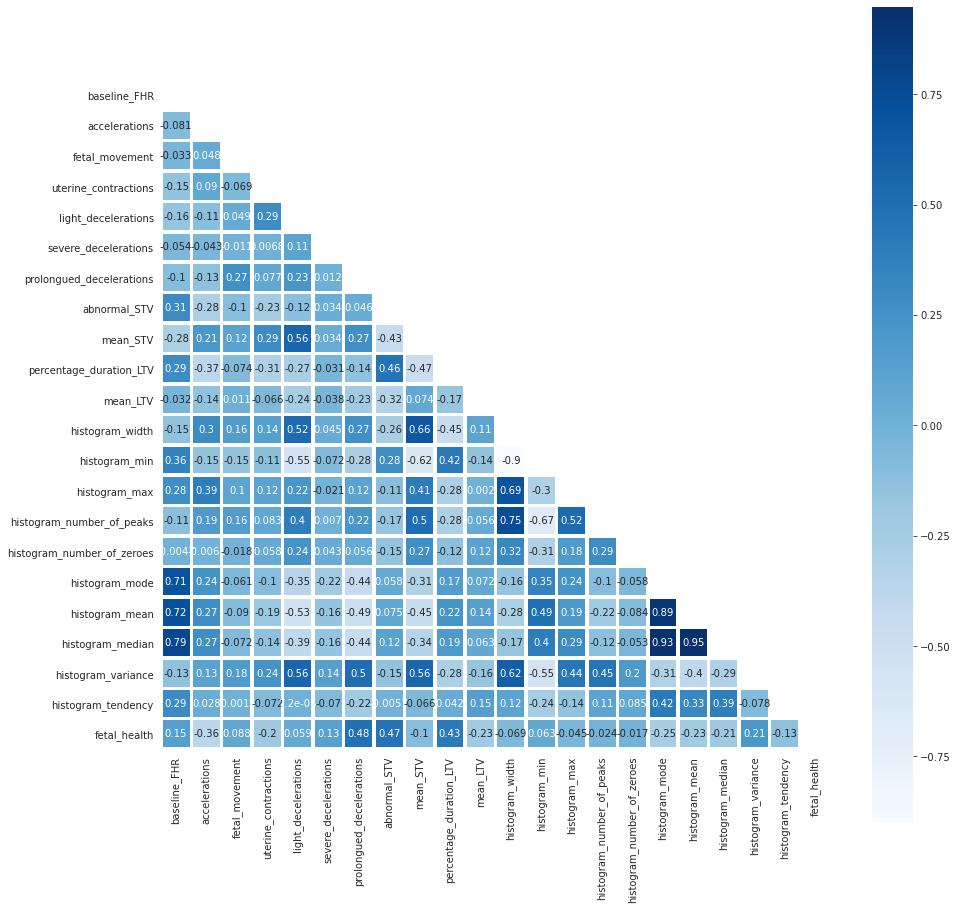

In [9]:
#visualize the correlation
target = df["fetal_health"]
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5,cmap="Blues",annot=True)

## Target Variables
The target class, fetal health, is very unbalanced. About 78% of the fetal health outcomes observed in this dataset are Normal. The class with the second-highest frequency is the Suspect fetal health  and the lowest frequency is Pathological fetal health.

Text(0.5, 1.0, 'Count of Target Variable')

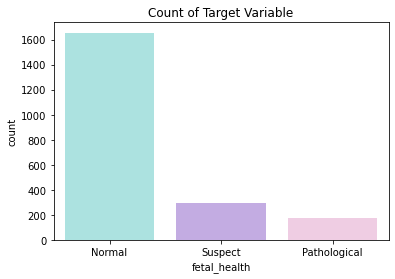

In [11]:
colors=["#A3EBE8","#C2A3EB", "#F5C7E5"]
ax=sns.countplot(data= df, x="fetal_health",palette=colors)
#ax.set_xticks(["Normal","Suspect","Pathological"])
ax.set_xticklabels(["Normal","Suspect","Pathological"])
ax.set_title("Count of Target Variable")

In [12]:
class_counts = df["fetal_health"].value_counts()
class_perc = (class_counts / len(df["fetal_health"])) * 100
target_df = pd.DataFrame(class_counts)
target_df["percent"] = class_perc 
target_df.index=["Normal","Suspect","Pathological"]
target_df.rename(columns={"fetal_health":"count"},inplace=True)
target_df

,count,percent
Normal,1655,77.845720
Suspect,295,13.875823
Pathological,176,8.278457


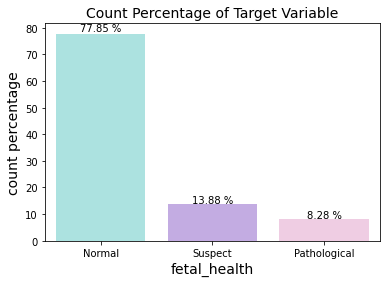

In [13]:
ax = sns.barplot(x=target_df.index,y=round(target_df.percent,2),palette=colors)
plt.title("Count Percentage of Target Variable", fontsize = 14)
plt.xlabel("fetal_health", fontsize = 14)
plt.ylabel("count percentage", fontsize = 14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")

plt.show()

## Encoding
The target values were already ordinal encoded: normal was 1, suspect was 2, pathological was 3. 0rdinal encoding converts each label into integer values and the encoded data represents the sequence of labels. In this case, normal indicates that the foetus is healthy so low concern, suspect would be medium concern and pathological is high concern.

To make the data slightly easier to work with and understand, and I turned it  into a binary classification problem, I combined the suspect and pathological classes into a category called distressed. So, i changed every instance of pathological classes into a 2 and normal and suspect remained the same. This maintains the order or hierarchy of the target variables as before.

These changes are reflect in the fetal health_outcome column and I had dropped the previous fetal_health column.
But this is still very imbalanced, but is somewhat more straightforward as a binary classification problem.

In [14]:
#change any value of the target value above one to two, creating two target classes instead of three classes. 
df.loc[df['fetal_health']==1.000, 'fh_outcome'] = 1
df.loc[df['fetal_health']==2.000, 'fh_outcome'] = 2
df.loc[df['fetal_health']==3.000, 'fh_outcome'] = 2

In [15]:
df.sample(7)

,baseline_FHR,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_STV,mean_STV,percentage_duration_LTV,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,fh_outcome
801,146.0,0.000,0.000,0.005,0.001,0.0,0.000,65.0,0.4,41.0,...,162.0,4.0,0.0,152.0,150.0,152.0,1.0,0.0,2.0,2.0
468,144.0,0.000,0.002,0.002,0.000,0.0,0.000,84.0,0.3,34.0,...,170.0,2.0,0.0,144.0,143.0,145.0,0.0,-1.0,3.0,2.0
1332,128.0,0.008,0.010,0.003,0.005,0.0,0.000,27.0,1.9,0.0,...,198.0,12.0,0.0,135.0,125.0,135.0,59.0,0.0,1.0,1.0
323,135.0,0.000,0.000,0.000,0.000,0.0,0.000,62.0,0.5,71.0,...,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0,2.0
1787,121.0,0.006,0.004,0.004,0.006,0.0,0.000,56.0,1.9,0.0,...,169.0,5.0,1.0,124.0,121.0,127.0,38.0,0.0,1.0,1.0
2037,128.0,0.000,0.002,0.007,0.005,0.0,0.002,66.0,2.7,0.0,...,192.0,4.0,0.0,105.0,89.0,112.0,21.0,0.0,3.0,2.0
690,133.0,0.000,0.360,0.004,0.002,0.0,0.002,18.0,2.7,0.0,...,174.0,4.0,0.0,115.0,120.0,121.0,48.0,0.0,3.0,2.0


In [16]:
df["fh_outcome"].value_counts()

1.0    1655
2.0     471
Name: fh_outcome, dtype: int64

Text(0.5, 1.0, 'Count of Target Variable')

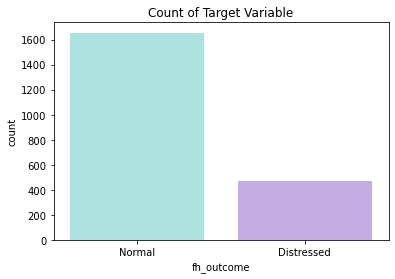

In [17]:
colors=["#A3EBE8","#C2A3EB", "#F5C7E5"]
ax=sns.countplot(data= df, x="fh_outcome",palette=colors)
#ax.set_xticks(["Normal","Suspect","Pathological"])
ax.set_xticklabels(["Normal","Distressed"])
ax.set_title("Count of Target Variable")

In [18]:
target_df = pd.DataFrame(df["fh_outcome"].value_counts())
target_df["percent"] = (df["fh_outcome"].value_counts() / len(df["fh_outcome"])) * 100 
target_df.index=["Normal","Distressed"]
target_df.rename(columns={"fh_outcome":"count"},inplace=True)
target_df

,count,percent
Normal,1655,77.84572
Distressed,471,22.15428


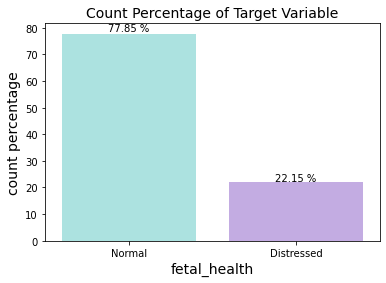

In [19]:
ax = sns.barplot(x=target_df.index,y=round(target_df.percent,2),palette=colors)
plt.title("Count Percentage of Target Variable", fontsize = 14)
plt.xlabel("fetal_health", fontsize = 14)
plt.ylabel("count percentage", fontsize = 14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")

plt.show()

# Modeling
I have used the ‘train_test_split’ to split the data in 70:30 ratio such 70% of the data will be used for training the model while 30% will be used for testing the model. I used the stratify parameter to make sure class ratios 
are distributed evenly across train and test sets since the dataset is so imbalanced.

I used F1 score and recall to evaluate the model’s performance. The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0

### Split Training/Testing Datasets with Stratification

In [20]:
# setting target and features
y = df['fh_outcome']
X = df.drop(columns=['fh_outcome','fetal_health'])

# splitting the data into train and test sets using stratify parameter to make sure class ratios 
# are distributed evenly across train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, test_size=0.3,random_state=42)

### Standardization of Features

In [21]:
#scaler = StandardScaler()  
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

### Evaluation Metric

In [22]:
#evaluation metric 
def evaluation(y_test, y_pred):
    print('Accuracy: '  + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))

### Feature Importance

In [23]:
# plotting feature importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

## Decision Tree

In [24]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
evaluation(y_test,y_pred)

Accuracy: 0.9357366771159875
Recall: 0.959758551307847
F1 Score: 0.9587939698492463
Precision: 0.9578313253012049


/Users/asma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


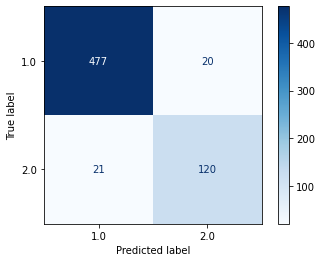

In [25]:
plot_confusion_matrix(dt, X_test, y_test,cmap="Blues")
plt.show()

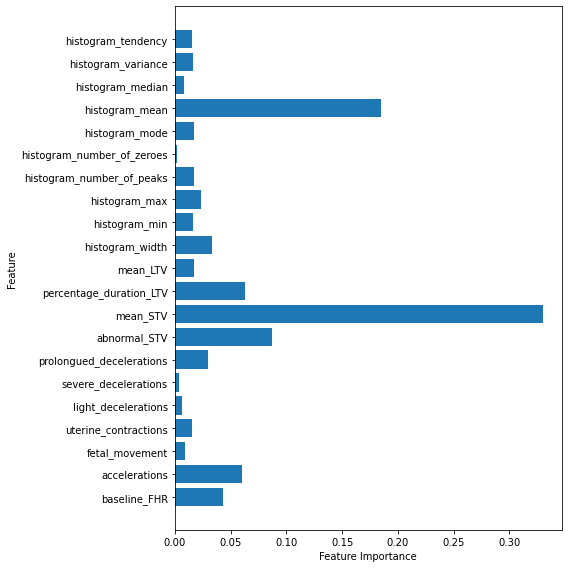

In [26]:
plot_feature_importances(dt)
plt.tight_layout()

## Random Forest 

In [31]:
rfc = RandomForestClassifier(random_state=42)
rfc = rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
evaluation(y_test,y_pred)

Accuracy: 0.9482758620689655
Recall: 0.9698189134808853
F1 Score: 0.9669007021063191
Precision: 0.964


/Users/asma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


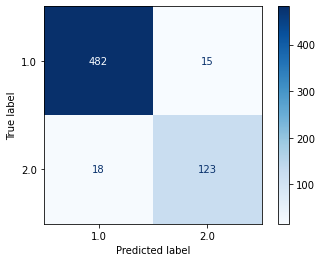

In [32]:
plot_confusion_matrix(rfc, X_test, y_test,cmap="Blues")
plt.show()

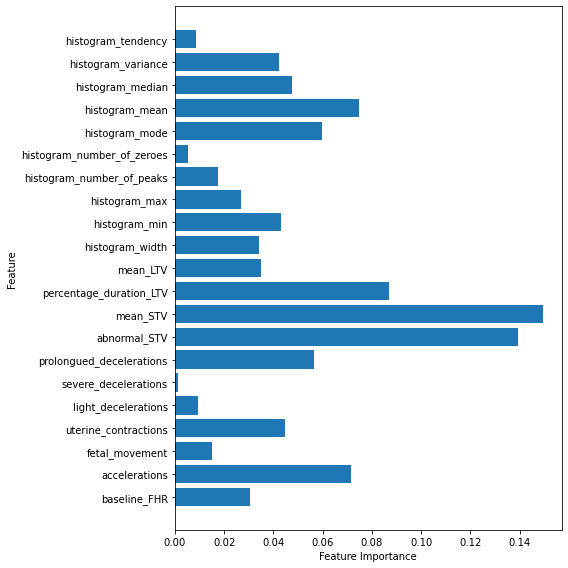

In [33]:
plot_feature_importances(rfc)
plt.tight_layout()

## Conclusion

The random forest produced just slightly higher scores than Decision Tree model. The random forest f1-scores is 0.97 and decision tree f1-score is 0.96. Further modeling will focus on identifying which features play a key role in fetal health classification, and how we can fine tune the models to improve upon the models that already good metric scores especially recall score.